In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
File=pd.read_csv("Titanic-Dataset.csv")

In [ ]:
File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
File

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
File.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
File['Age'].fillna(File['Age'].mean(),inplace=True)
File['Cabin'].fillna(File['Cabin'].mode()[0],inplace=True)
File['Embarked'].fillna(File['Embarked'].mode()[0],inplace=True)

In [ ]:
File.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
File.duplicated().sum()

0

In [ ]:
Label_encoder=preprocessing.LabelEncoder()
File['Sex']=Label_encoder.fit_transform(File['Sex'])
File['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [ ]:
File.drop(['Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [ ]:
File.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [ ]:
min_max=MinMaxScaler()
File['Fare']=min_max.fit_transform(File[['Fare']])
File.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,0.014151
1,2,1,1,0,38.000000,1,0,0.139136
2,3,1,3,0,26.000000,0,0,0.015469
3,4,1,1,0,35.000000,1,0,0.103644
4,5,0,3,1,35.000000,0,0,0.015713
5,6,0,3,1,29.699118,0,0,0.016510
6,7,0,1,1,54.000000,0,0,0.101229
7,8,0,3,1,2.000000,3,1,0.041136
8,9,1,3,0,27.000000,0,2,0.021731
9,10,1,2,0,14.000000,1,0,0.058694


In [ ]:
File['Age']=File['Age'].astype(int)
File.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22,1,0,0.014151
1,2,1,1,0,38,1,0,0.139136
2,3,1,3,0,26,0,0,0.015469
3,4,1,1,0,35,1,0,0.103644
4,5,0,3,1,35,0,0,0.015713
5,6,0,3,1,29,0,0,0.016510
6,7,0,1,1,54,0,0,0.101229
7,8,0,3,1,2,3,1,0.041136
8,9,1,3,0,27,0,2,0.021731
9,10,1,2,0,14,1,0,0.058694


# **Visualiztion**

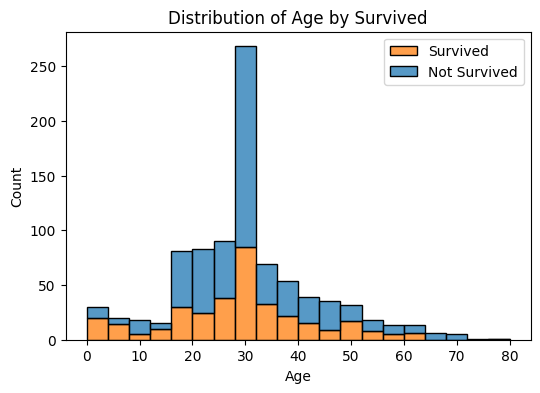

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=File,x='Age',hue='Survived',bins=20,cbar=True,multiple='stack')
plt.title('Distribution of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Survived','Not Survived'])
plt.show()


<Figure size 400x200 with 0 Axes>

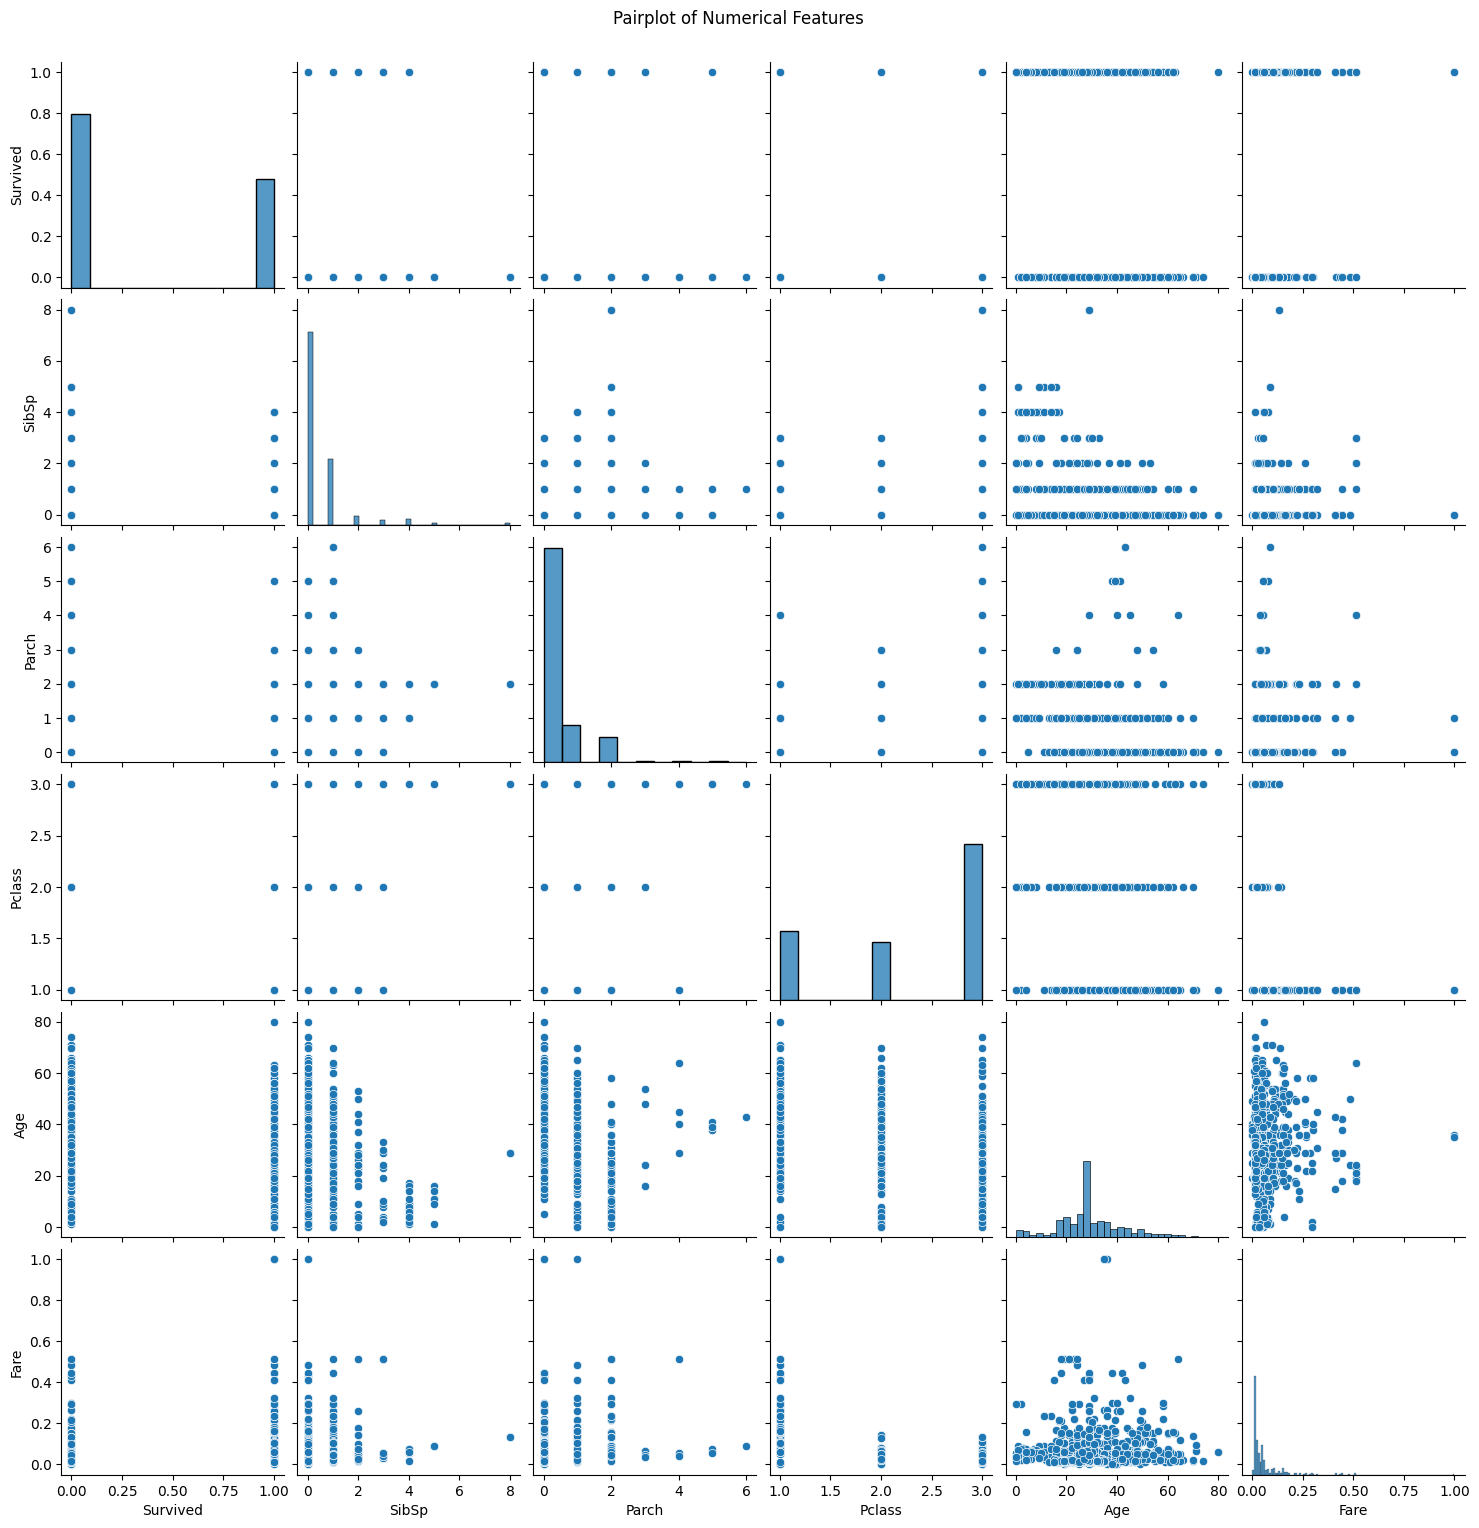

In [ ]:
plt.figure(figsize=(4, 2))
sns.pairplot(File[['Survived','SibSp', 'Parch', 'Pclass', 'Age', 'Fare']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

<ipython-input-54-f5a6a22f5e2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Sex', y = 'Survived', data = File,palette=cols)
<ipython-input-54-f5a6a22f5e2c>:3: UserWarning: The palette list has more values (891) than needed (2), which may not be intended.
  sns.barplot(x = 'Sex', y = 'Survived', data = File,palette=cols)


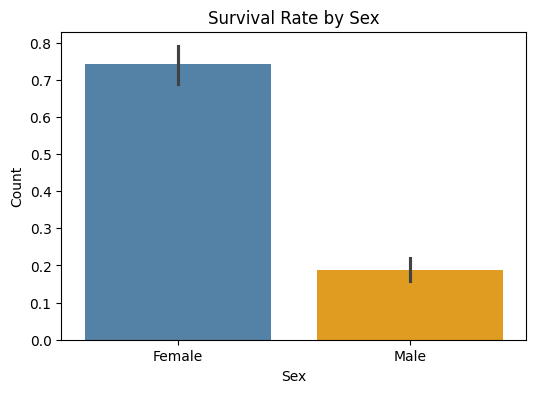

In [ ]:
plt.figure(figsize=(6, 4))
cols = ['steelblue' if x==1 else 'orange' for x in File.Sex]
sns.barplot(x = 'Sex', y = 'Survived', data = File,palette=cols)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


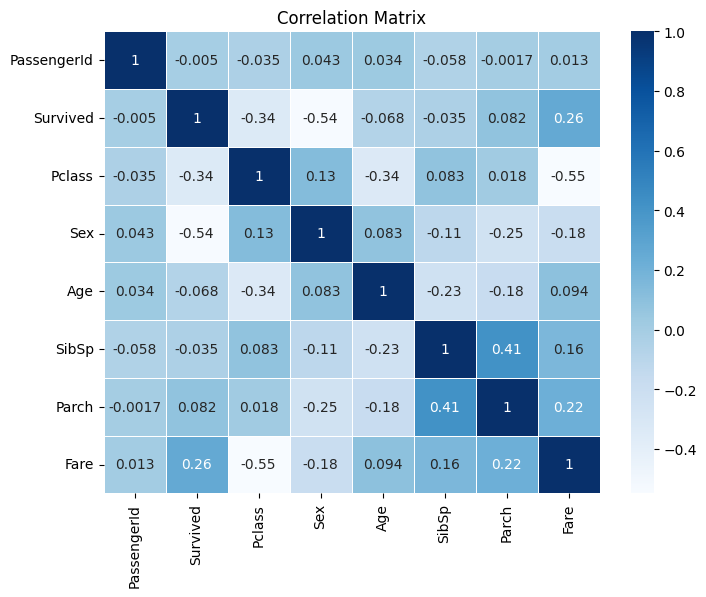

In [ ]:
corr_matrix =File.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

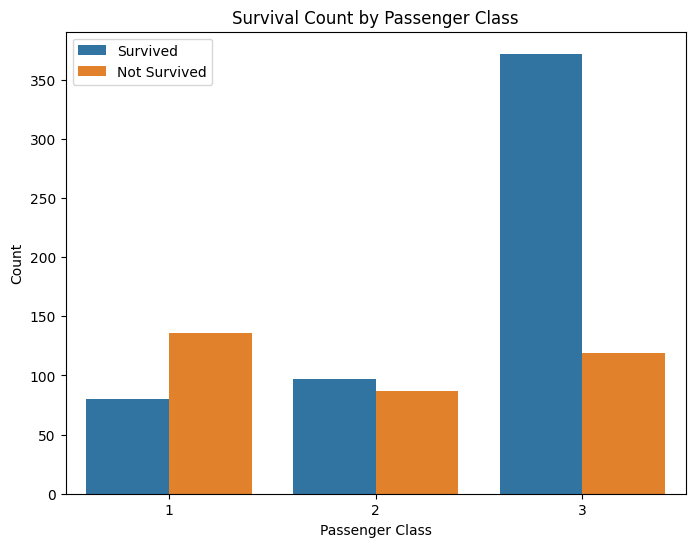

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=File, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Survived','Not Survived'])
plt.show()

# **Classification**

In [ ]:
X=File[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']].values
Y=File['Survived'].values
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=.20)
lgr=LogisticRegression()
lgr.fit(X_train,Y_train)
slope=lgr.coef_
intercept=lgr.intercept_
print("slope :",slope)
print("intercept :",intercept)


slope : [[ 2.43646744e-05 -9.19850578e-01 -2.85477696e+00 -3.36842895e-02
  -3.25442125e-01 -3.80054044e-01  1.33614696e+00]]
intercept : [4.55577781]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
prediction=lgr.predict(X_test)
results= pd.DataFrame({'Actual':Y_test,'Predicted':prediction})
print(results)

     Actual  Predicted
0         1          0
1         1          0
2         0          0
3         1          0
4         0          0
..      ...        ...
174       0          0
175       0          0
176       0          0
177       0          0
178       1          1

[179 rows x 2 columns]


In [ ]:
c_matrix=metrics.confusion_matrix(Y_test,prediction)
print("Classification report",classification_report(Y_test,prediction))
accuracy=accuracy_score(Y_test,prediction)
recall= recall_score(Y_test,prediction,average='macro')
precision=precision_score(Y_test,prediction, average='macro')
print(c_matrix)
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)

Classification report               precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

[[100  10]
 [ 22  47]]
Accuracy : 0.8212290502793296
Recall : 0.7951251646903821
Precision : 0.8221167673281564
